### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Παναγιώτης Μπέλσης

Α.Μ.: 03120874

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [148]:
import numpy as np
indian_pines_image = np.load('indian_pines_corrected.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [149]:
# μεσα στο indian_pines_gt.npy είναι οι κλάσεις
indian_pines_labels = np.load('indian_pines_gt.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [150]:
#2α. Πληροφορίες για τις διαστάσεις και τον αριθμό των υπερφασματικών καναλιών
import matplotlib.pyplot as plt

height, width, num_channels = indian_pines_image.shape
print(f"Ύψος: {height}, Πλάτος: {width}, Κανάλια: {num_channels}")

Ύψος: 145, Πλάτος: 145, Κανάλια: 200


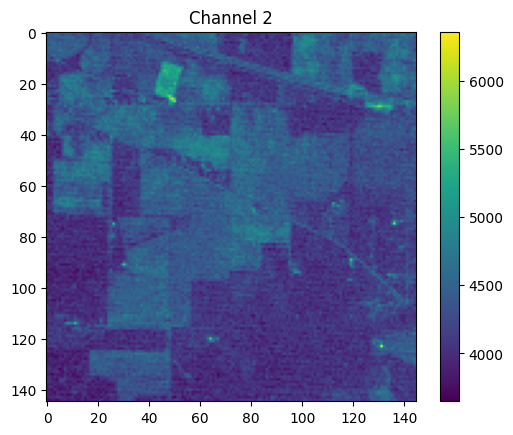

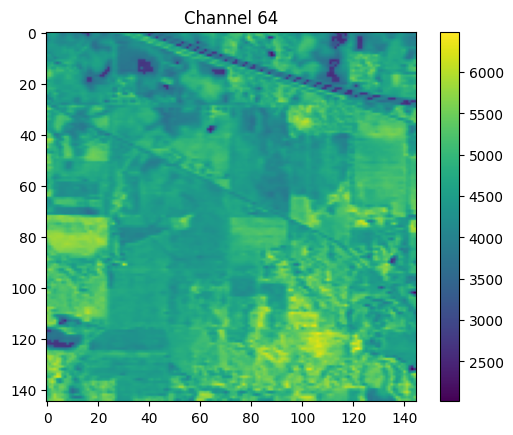

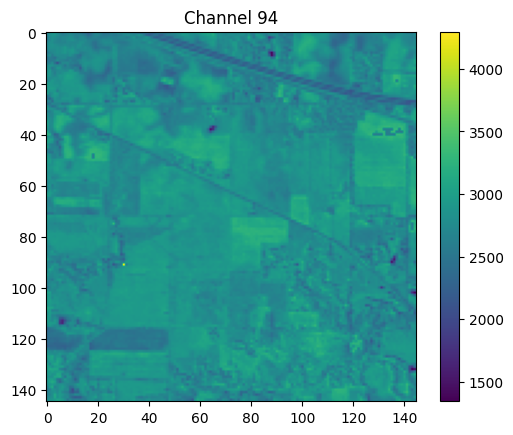

In [151]:
# 2β. Σχεδίαση του 3ου, 65ου και 95ου καναλιού
channels_to_plot = [2, 64, 94]  # Οι αρίθμοι των καναλιών ξεκινούν από το 0
for channel in channels_to_plot:
    plt.figure()
    plt.imshow(indian_pines_image[:, :, channel], cmap='viridis')
    plt.title(f"Channel {channel}")
    plt.colorbar()
    plt.show()

In [152]:
#2γ. Αριθμός διαφορετικών κατηγοριών
num_categories = len(np.unique(indian_pines_labels))
print(f"Αριθμός διαφορετικών κατηγοριών: {num_categories}")

Αριθμός διαφορετικών κατηγοριών: 17


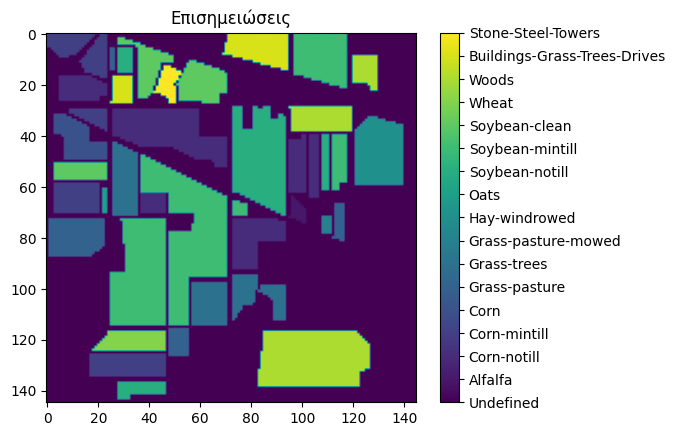

In [153]:
# 2δ. Σχεδίαση των επισημειώσεων

classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

plt.figure()
plt.imshow(indian_pines_labels, cmap='viridis')
plt.title("Επισημειώσεις")
cbar = plt.colorbar(ticks=np.unique(indian_pines_labels))

# κάνουμε map τα ονόματα στο plot 0->undefined
cbar.set_ticklabels(classes)

plt.show()

In [154]:
# 2ε. Υπολογισμός πλήθους pixels για κάθε κατηγορία
category_counts = np.zeros(num_categories)
for category in range(num_categories):
    category_counts[category] = np.sum(indian_pines_labels == category)

for i, count in enumerate(category_counts):
    print(f"{classes[i]}: {int(count)} pixels")

Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [155]:
# 3α. Μετατροπή σε κατάλληλη μορφή
#το -1, είναι το Ν*Κ

image_reshaped = indian_pines_image.reshape(-1, indian_pines_image.shape[-1])
labels_reshaped = indian_pines_labels.flatten()

# Αφαίρεση των Undefined δεδομένων
valid_indices = labels_reshaped != 0
image_reshaped = image_reshaped[valid_indices]
labels_reshaped = labels_reshaped[valid_indices]

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [156]:
# 3β. Επιλογή ενός τυχαίου pixel από κάθε κατηγορία
unique_labels = np.unique(labels_reshaped)
selected_pixels = []

for label in unique_labels:
    indices = np.where(labels_reshaped == label)[0]
    random_index = np.random.choice(indices)
    selected_pixels.append(random_index)


3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

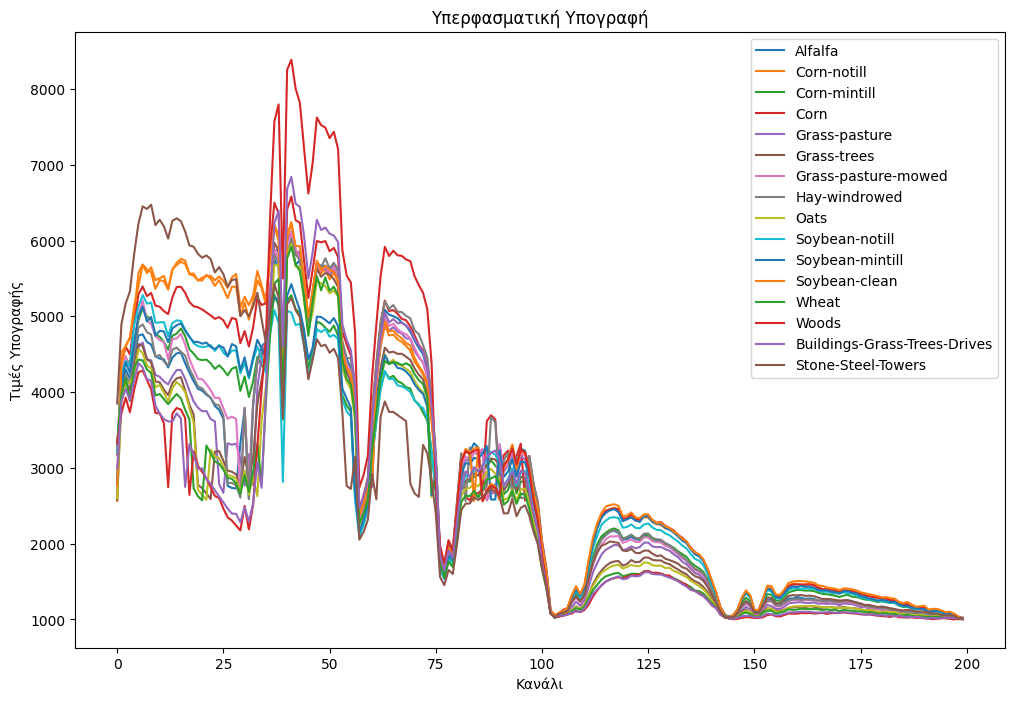

In [157]:
# 3γ. Σχεδίαση της υπερφασματικής υπογραφής των επιλεγμένων pixels
plt.figure(figsize=(12, 8))
for i, index in enumerate(selected_pixels): # το selected_pixels είναι από 16 διαφορετικές κατηγορίες
    plt.plot(image_reshaped[index], label=f"{classes[i+1]}")

plt.title("Υπερφασματική Υπογραφή")
plt.xlabel("Κανάλι")
plt.ylabel("Τιμές Υπογραφής")
plt.legend()
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

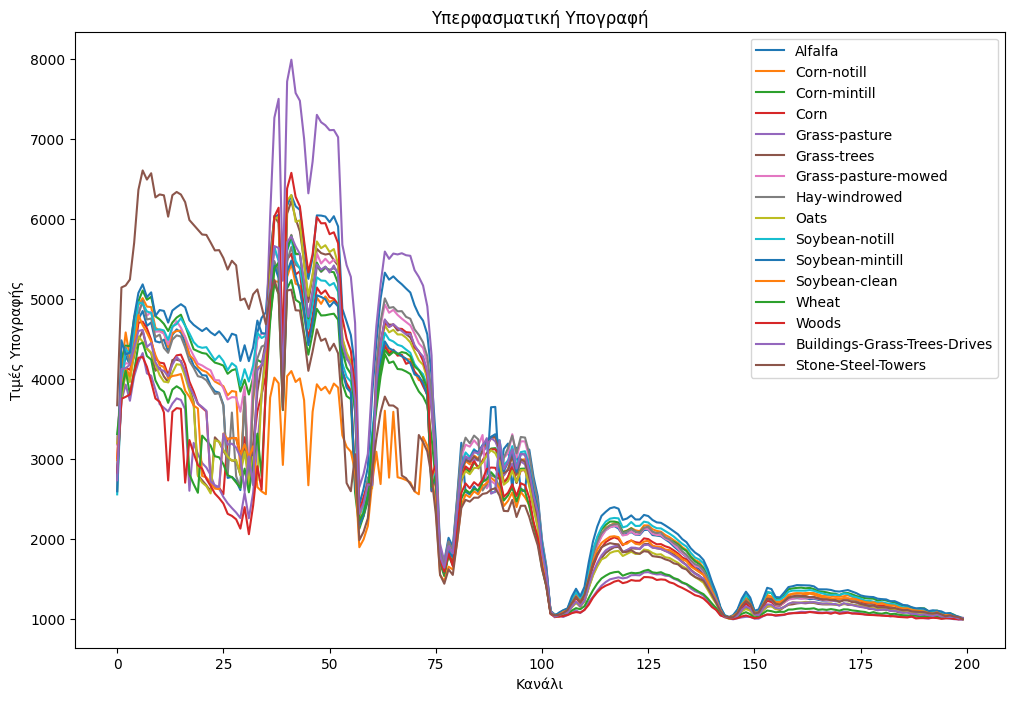

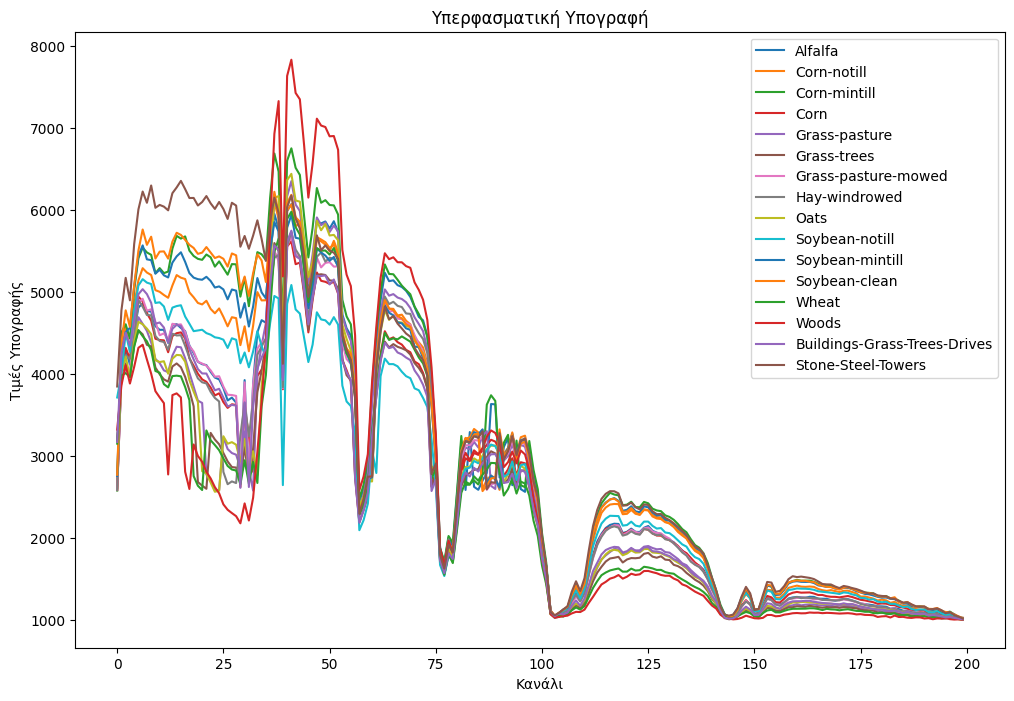

In [158]:
#3.δ
for _ in range(2):
  selected_pixels = []

  for label in unique_labels:
      indices = np.where(labels_reshaped == label)[0]
      random_index = np.random.choice(indices)
      selected_pixels.append(random_index)

  plt.figure(figsize=(12, 8))
  for i, index in enumerate(selected_pixels):
      plt.plot(image_reshaped[index], label=f"{classes[i+1]}")

  plt.title("Υπερφασματική Υπογραφή")
  plt.xlabel("Κανάλι")
  plt.ylabel("Τιμές Υπογραφής")
  plt.legend()
  plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Όντως κάποιες καλλιέργειες είναι πιο εύκολα
διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους. Για παράδειγμα το corn έχει τιμή υπογραφής μέχρι 9000 (πολύ πιο πάνω από τις άλλες καλλιέργειες) για κανάλια 25-50

Δεν παρέχουν όλα τα κανάλια χρήσιμη πληροφορία για τον διαχωρισμό. Στα κανάλια 175-200 οι τιμές υπογραφής διαφέρουν ελάχιστα και οπότε η διάκριση δεν είναι εύκολη.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

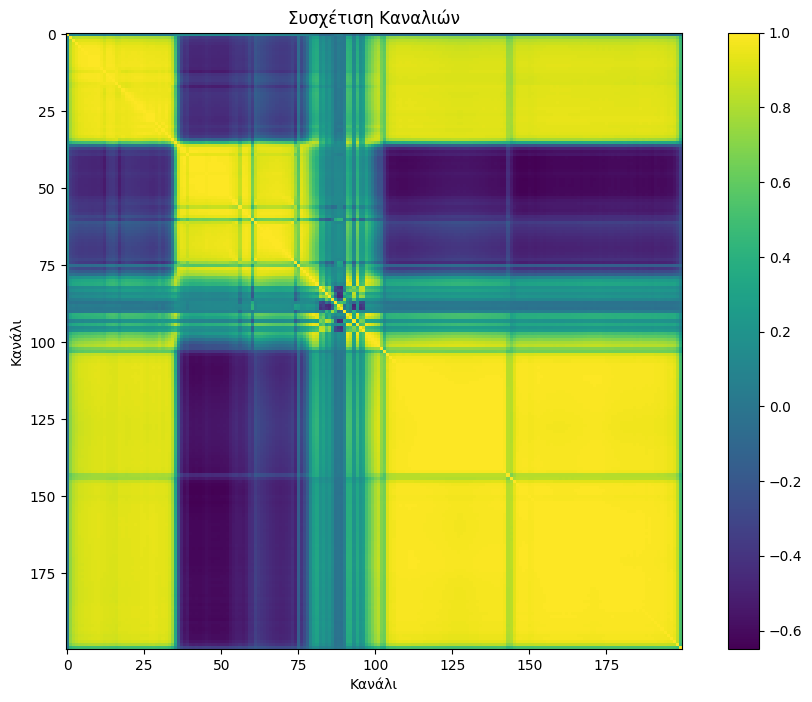

In [159]:
# 3στ. Σχεδίαση heatmap για τη συσχέτιση των καναλιών
correlation_matrix = np.corrcoef(image_reshaped.T)
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.title("Συσχέτιση Καναλιών")
plt.xlabel("Κανάλι")
plt.ylabel("Κανάλι")
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [160]:
from sklearn.cluster import KMeans

# Αφαίρεση των Undefined δεδομένων
valid_indices = labels_reshaped != 0
image_reshaped = image_reshaped[valid_indices]
labels_reshaped = labels_reshaped[valid_indices]

# Εφαρμογή του αλγορίθμου k-Means
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(image_reshaped)
cluster_centers = kmeans.cluster_centers_
labels_predicted = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [161]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [162]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

# Translate predicted labels
#labels_reshaped -1 διοτι ξεκιναει απο το 1 και το φέρνω στα ισια του
translated_predicted_labels = translate_predicted_labels(labels_predicted, labels_reshaped -1)

# Calculate Accuracy Score
accuracy = accuracy_score(labels_reshaped-1, translated_predicted_labels)
print(f"Accuracy Score: {accuracy}")

# Calculate Rand Score
rand_score = adjusted_rand_score(labels_reshaped-1, translated_predicted_labels)
print(f"Rand Score: {rand_score}")

# Calculate Silhouette Score (only if the number of clusters is greater than 1)
if len(np.unique(translated_predicted_labels)) > 1:
    silhouette = silhouette_score(image_reshaped-1, translated_predicted_labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score cannot be calculated with only one cluster.")


map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy Score: 0.3554493121280125
Rand Score: 0.205184479919157
Silhouette Score: 0.2821754627335447


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

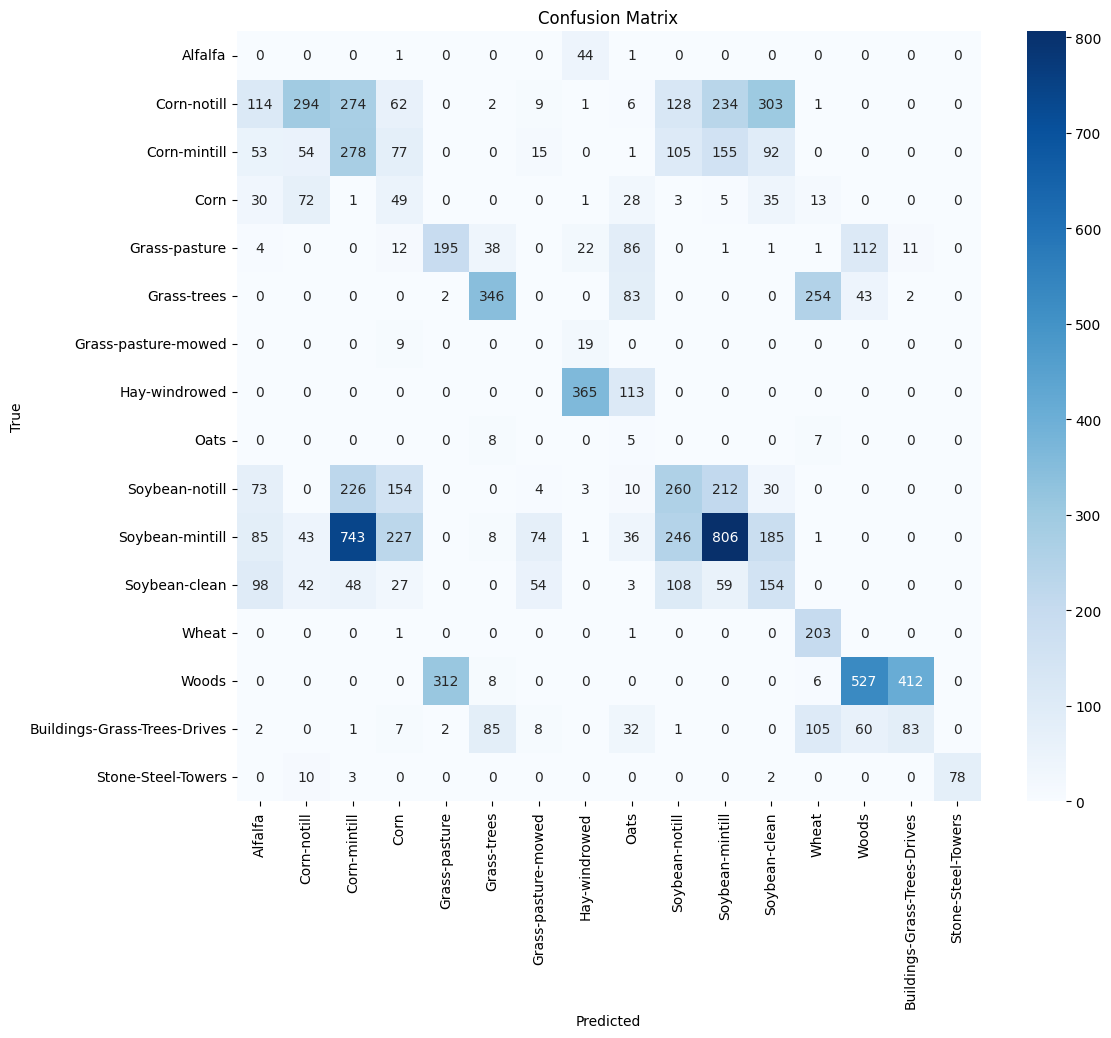

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(labels_reshaped - 1, translated_predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes[1:], yticklabels=classes[1:])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


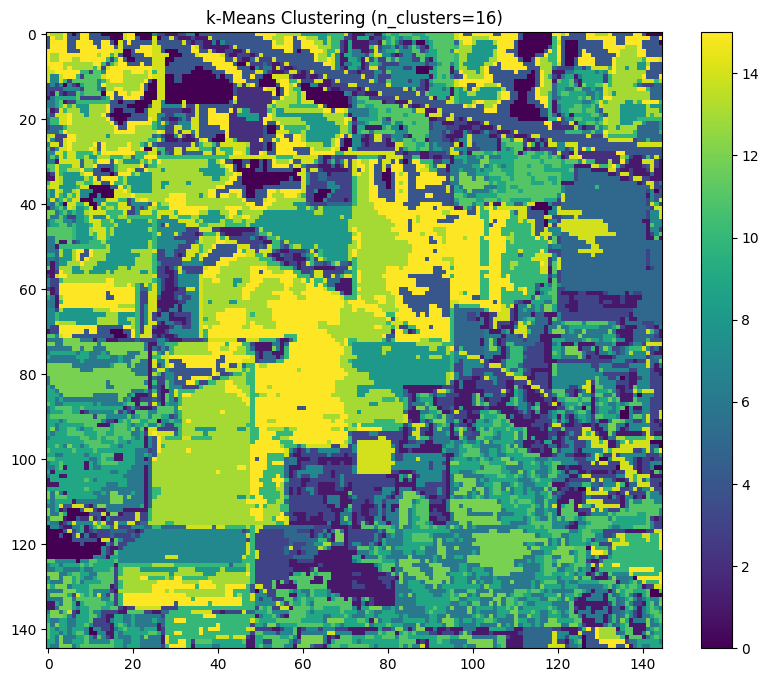

In [164]:
from sklearn.cluster import KMeans

# reshape δεδομένων για το k-Means
X = indian_pines_image.reshape((-1, num_channels))

# k-Means algorithm
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Ανάθεση των ετικετών σε κάθε pixel
labels_kmeans = kmeans.labels_.reshape((height, width))

# Σχεδίαση του χάρτη των clusters
plt.figure(figsize=(10, 8))
plt.imshow(labels_kmeans, cmap='viridis')
plt.title(f'k-Means Clustering (n_clusters={n_clusters})')
plt.colorbar()
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [165]:
from sklearn.decomposition import PCA

# n_components=3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(image_reshaped)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [166]:
# Ποσοστό διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα
explained_variance_ratio = pca.explained_variance_ratio_

# Συνολικό ποσοστό διακύμανσης που διατηρείται
total_variance_retained = np.sum(explained_variance_ratio)

print("Ποσοστό διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Κύρια Συνιστώσα {i}: {ratio:.2%}")

print(f"\nΣυνολικό ποσοστό διακύμανσης που διατηρείται με n_components=3: {total_variance_retained:.2%}")


Ποσοστό διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα:
Κύρια Συνιστώσα 1: 66.45%
Κύρια Συνιστώσα 2: 26.54%
Κύρια Συνιστώσα 3: 1.21%

Συνολικό ποσοστό διακύμανσης που διατηρείται με n_components=3: 94.20%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

# Εφαρμογή του αλγορίθμου k-Means στα δεδομένα PCA
kmeans_pca = KMeans(n_clusters=16, random_state=42)
kmeans_pca.fit(pca_result)

labels_predicted_pca = kmeans_pca.labels_

# Translate predicted labels using the provided function
translated_predicted_labels_pca = translate_predicted_labels(labels_predicted_pca, labels_reshaped - 1)

# Calculate Accuracy Score
accuracy_pca = accuracy_score(labels_reshaped - 1, translated_predicted_labels_pca)
print(f"Accuracy Score with PCA: {accuracy_pca}")

# Calculate Rand Score
rand_score_pca = adjusted_rand_score(labels_reshaped - 1, translated_predicted_labels_pca)
print(f"Rand Score with PCA: {rand_score_pca}")

# Υπολογισμός Silhouette Score αριθμος ομαδων>1
if len(np.unique(translated_predicted_labels_pca)) > 1:
    silhouette_pca = silhouette_score(pca_result, translated_predicted_labels_pca)
    print(f"Silhouette Score with PCA: {silhouette_pca}")
else:
    print("Silhouette Score cannot be calculated with only one cluster.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5
Accuracy Score with PCA: 0.3450092691969948
Rand Score with PCA: 0.20159043693986198
Silhouette Score with PCA: 0.3746252136577424


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

In [ ]:
import matplotlib.pyplot as plt


accuracy_scores = []
rand_scores = []
silhouette_scores = []

for n in range(1, 11):
    # Εφαρμογή PCA
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(image_reshaped)

    # Εφαρμογή k-Means στα δεδομένα PCA
    kmeans_pca = KMeans(n_clusters=16, random_state=42)
    kmeans_pca.fit(pca_result)

    # Πρόβλεψη ετικετών για τα δεδομένα
    labels_predicted_pca = kmeans_pca.labels_
    translated_predicted_labels_pca = translate_predicted_labels(labels_predicted_pca, labels_reshaped - 1)

    # Υπολογισμός των scores
    accuracy = accuracy_score(labels_reshaped - 1, translated_predicted_labels_pca)
    rand_score = adjusted_rand_score(labels_reshaped - 1, translated_predicted_labels_pca)

    # Υπολογισμός Silhouette Score αριθμος ομαδων>1
    if len(np.unique(translated_predicted_labels_pca)) > 1:
        silhouette = silhouette_score(pca_result, translated_predicted_labels_pca)
    else:
        silhouette = None

    # Αποθήκευση των scores
    accuracy_scores.append(accuracy)
    rand_scores.append(rand_score)
    silhouette_scores.append(silhouette)


plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), accuracy_scores, label='Accuracy')
plt.plot(range(1, 11), rand_scores, label='Rand Score')
plt.plot(range(1, 11), silhouette_scores, label='Silhouette Score', marker='o')

plt.title('Επίδραση του n_components στα αποτελέσματα του k-Means')
plt.xlabel('n_components')
plt.ylabel('Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 7
map: 2 --> 13
map: 3 --> 10
map: 4 --> 11
map: 5 --> 5
map: 6 --> 6
map: 7 --> 2
map: 8 --> 4
map: 9 --> 3
map: 10 --> 12
map: 11 --> 15
map: 12 --> 8
map: 13 --> 9
map: 14 --> 14
map: 15 --> 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 9
map: 3 --> 4
map: 4 --> 7
map: 5 --> 0
map: 6 --> 3
map: 7 --> 14
map: 8 --> 1
map: 9 --> 6
map: 10 --> 10
map: 11 --> 8
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 12
map: 3 --> 5
map: 4 --> 3
map: 5 --> 1
map: 6 --> 4
map: 7 --> 6
map: 8 --> 9
map: 9 --> 0
map: 10 --> 7
map: 11 --> 8
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 5
map: 1 --> 10
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 2
map: 6 --> 11
map: 7 --> 7
map: 8 --> 14
map: 9 --> 12
map: 10 --> 6
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 0
map: 1 --> 9
map: 2 --> 14
map: 3 --> 11
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 10
map: 8 --> 7
map: 9 --> 12
map: 10 --> 6
map: 11 --> 3
map: 12 --> 1
map: 13 --> 15
map: 14 --> 13
map: 15 --> 8


Από το παραπάνω διάγραμμα προκύπτει ότι συνήθως με την αύξηση του n_components το accuracy αυξάνεται.

Το Silhouette score με την αύξηση του n_components πέφτει.

Τέλος πρέπει να επιλεγεί κατάλληλη τιμή για το n_components έτσι ώστε να επικρατεί μια ισορροπία και να αποφευχθεί το ενδεχόμενο υπερεκπαίδευσης.